#  Handling of outliers when working with open market data: Part I



## Abstract
The best practice in valuation is to work with data that is directly observable in open markets. This assertion is based on, among other things, the statements of __[IFRS 13 Fair Value Mesurement](https://www.ifrs.org/content/dam/ifrs/publications/pdf-standards/english/2022/issued/part-a/ifrs-13-fair-value-measurement.pdf?bypass=on)__, __[IVS 2022](https://www.rics.org/contentassets/542170a3807548a28aebb053152f1c24/ivsc-effective-31-jan-2022.pdf)__, and __[RVGS 2022](https://www.rics.org/globalassets/rics-website/media/upholding-professional-standards/sector-standards/valuation/2021-11-25_rics-valuation--global-standards-effective-2022.pdf)__. One of the problems of market data is the problem of __[outliers](https://en.wikipedia.org/wiki/Outlier)__, i.e. observations whose value of a feature differs significantly from the rest. This material contains no theory.  It is aimed at handling of outliers using the Python language. We will work on the example of the residential real estate market in Almaty (Republic of Kazakhstan). As we work on this topic, we will consider the following questions:
<ul>
<li>what are the basic ways of handling outliers?</li>
<li>how to detect and handle outliers using Python?</li>
</ul>
In all, we will look at three simple ways to handle outliers. Python is more a language for business and professional activities than for science. A number of more complex methods of handling outliers will be discussed in a separate material containing code in R. In this paper we will limit ourselves to the following methods: 
<ol>
<li>the aprroach based on the empirical relations of the Normal distribution (The z-score approach);</li>
<li>Tukey's fences (or the inter-quartile range (IQR) proximity rule);</li>
<li>the quantile-based approach.</li>
</ol>
This list of methods is not exhaustive. However, they will help cover the needs of an appraiser who is beginning to apply machine learning and mathematical statistics methods to his or her work.


## Possible ways to handle outliers
Before we proceed directly to work with the data, let us answer the question of what can be done with the observations identified as outliers at all. The choice of how to deal with an outlier should depend on the cause. Some estimators are highly sensitive to outliers, notably __[estimation of covariance matrices](https://en.wikipedia.org/wiki/Estimation_of_covariance_matrices)__. But this article is intended for appraisers just beginning to learn about the application of artificial intelligence methods. Therefore, it will consider only some basic ways of solving the outliers problem. With this simplification, we can identify the following approaches to the handling of outliers.

**Retention** Even when a normal distribution model is appropriate to the data being analyzed, outliers are expected for large sample sizes and should not automatically be discarded if that is the case. The application should use a classification algorithm that is robust to outliers to model data with naturally occurring outlier points. 

**Exclusion** Deletion of outlier data is a controversial practice frowned upon by many scientists. While mathematical criteria provide an objective and quantitative method for data rejection, they do not make the practice more scientifically or methodologically sound, especially in small sets or where a normal distribution cannot be assumed. Rejection of outliers is more acceptable in areas of practice where the underlying model of the market being measured and the usual distribution of measurement error are confidently known. An outlier resulting from a data collection error or clear error in the source may be excluded, but it is desirable that the source is at least verified. In any case, appraiser must clear disclose data about the initial set of observations as well as the reason of its part exclusion.

The two common approaches to exclude outliers are __[truncation](https://en.wikipedia.org/wiki/Truncation_(statistics))__ (or __[trimming](https://en.wikipedia.org/wiki/Trimmed_estimator)__) and __[Winsorizing](https://en.wikipedia.org/wiki/Winsorizing)__ (or winsorization as well as capping). Trimming discards the outliers whereas Winsorising replaces the outliers with the nearest 'nonsuspect' data.
<ul>
<li><b>Truncation</b> This method excludes the outlier values from our analysis. By applying this technique, we lose some data. Its main advantages are its simplest and fastest nature. The more outliers, the less reliable the final model will be, because it will be based on an increasingly smaller sample.</li>
    <li><b>Winsorizing</b> &#151 is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. Note that winsorizing is not equivalent to aforementioned simply excluding data, which is a simpler procedure, called trimming or truncation, but is a method of censoring data. </li>
</ul>

**Treating outliers as a missing value** By assuming outliers as the missing observations, treat them accordingly, i.e, same as those of missing values. You can read, for example, __[this brief introduction](https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/)__ to the possible ways to handle missing values. Let me remind you that we are now looking at the very basics of machine learning in valuation.  Therefore, all of the methods, articles, and materials referenced in this paper are intended as an introduction to the topic.

Of course, there are a number of other more sophisticated methods. However, it is possible to limit yourself to these methods outlined above to begin to handle outliers successfully.

## Possible ways to detect outliers
First of all, it should be said that it is hardly possible to draw up an exhaustive list of methods for identifying outliers. We can only mention some well-known well-developed methods such as __[Chauvenet's criterion](https://en.wikipedia.org/wiki/Chauvenet%27s_criterion)__, __[Peirce's criterion](https://en.wikipedia.org/wiki/Peirce%27s_criterion)__, __[Local Outlier Factor](https://en.wikipedia.org/wiki/Local_Outlier_Factor)__, __[Modified Thompson Tau test](https://en.wikipedia.org/wiki/Studentized_residual#Distribution)__, __[Grubbs's test](https://en.wikipedia.org/wiki/Grubbs%27s_test)__, __[Dixon's Q test](https://en.wikipedia.org/wiki/Dixon%27s_Q_test)__, __[Rosner's Outlier Test](https://vsp.pnnl.gov/help/vsample/rosners_outlier_test.htm)__. etc. But in this paper, we will consider some of the simplest and most intuitive methods that do not require special knowledge of mathematical statistics and machine learning. Therefore, we will limit ourselves to three methods, the choice of which depends on the distribution of the data in the sample.

### Normal or approximately normal distribution
In this case we can use **empirical relations of Normal distribution (The z-score approach)**. The data points which fall below $\bar y - 3\sigma$ or above $\bar y + 3\sigma$ are outliers, where $\bar y$ and $\sigma$ are the mean and the standard deviation respectively.

This figure was taken from the Wikipedia article __['Standard score'](https://en.wikipedia.org/wiki/Standard_score)__.

### Skewed distribution
In this case we should prefer **Tukey's fences (or the Inter-Quartile Range (IQR) proximity rule)**. The data points which fall below $Q1 – 1.5\cdot IQR$ or above $Q3 + 1.5\cdot IQR$ are outliers, where $Q1$ and $Q3$ are the $0.25$ and $0.75$ quantiles of the dataset respectively, and IQR represents the inter-quartile range and given by $Q3 – Q1$.

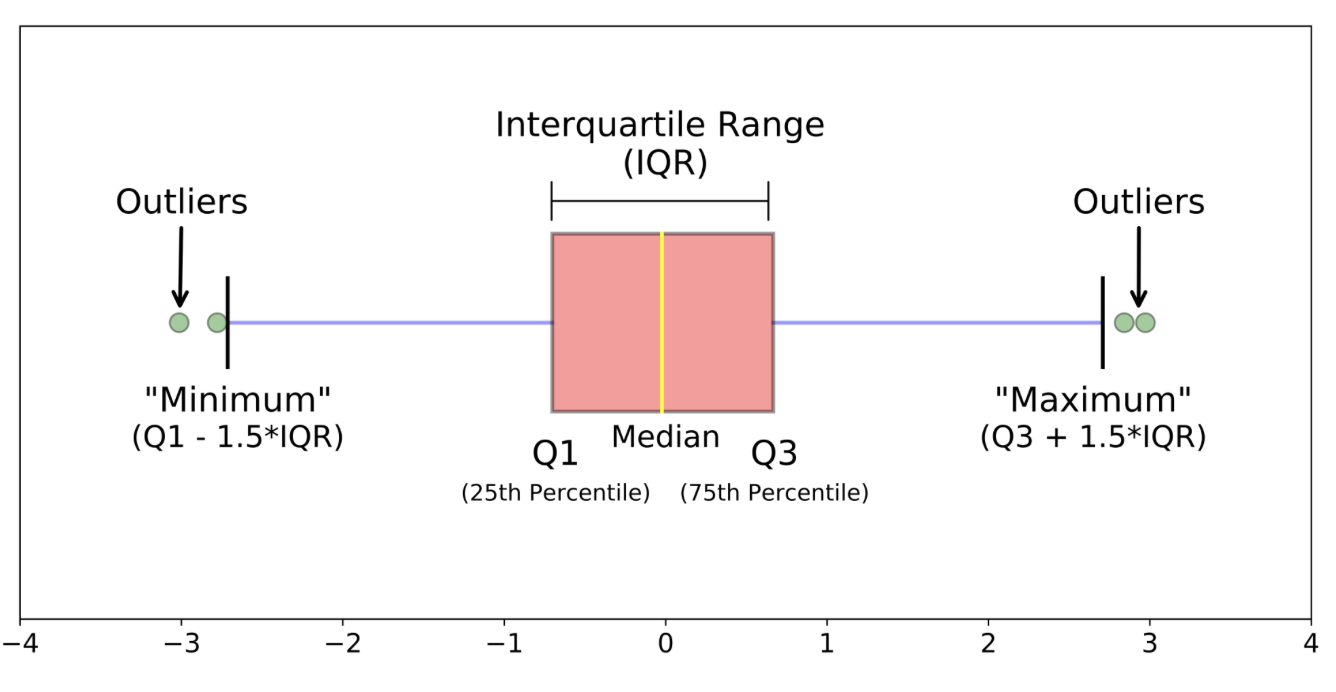

This figure was taken from article __['Practical Guide to Outlier Detection Methods'](https://towardsdatascience.com/practical-guide-to-outlier-detection-methods-6b9f947a161e)__.

### Unknown distribution
It's reasonable to use **The percentile-based approach** in such a case. *For example*, we can set by ourselves that data points that are greater than from 0.99 quantile and less than 0.01 auantile are considered to be an outlier.

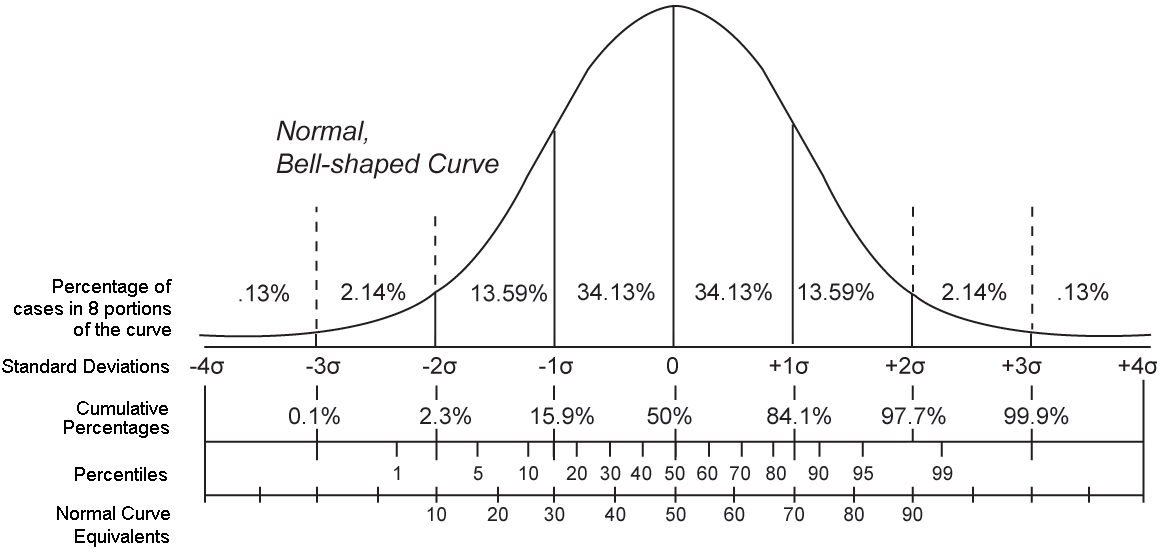

## Practical implementation in Python

### The z-score approach
Key assumption: the features are normally or approximately normally distributed.

Step 1: import necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Import data and create the dataset

In [6]:
almatyApts = pd.read_csv('almaty-apts-2019-1.csv')
almatyApts.sample(5)

id     price  price_m   total_square   living_square  ratio_livtot  \
268    269  27000000   364865            74.0           63.0          0.85   
2116  2117  19000000   327586            58.0           42.0          0.72   
122    123  19300000   364151            53.0           33.3          0.63   
43      44  22500000   330882            68.0           20.0          0.29   
2261  2262  14000000   333333            42.0           20.0          0.48   

      rooms  level  total_levels  not_ground_floor  ...  concrete  \
268       3      4             8                 1  ...         0   
2116      3      3             4                 1  ...         0   
122       2      5             5                 1  ...         0   
43        1      7            11                 1  ...         1   
2261      1      5             6                 1  ...         1   

      part_furniture  full_furniture  year  walls  condition  price_m_k  \
268                1               1  1982      k       good      364.9   
2116               1               1  1966      p       good      327.6   
122                0               0  1995      k       high      364.2   
43                 1               1  2011      m       high      330.9   
2261               1               0  2008      m       good      333.3   

      furniture  district_name  district_code  
268           2    NBH aksaj-1             17  
2116          2          NBH 8             40  
122           0  NBH zhetysu-4             16  
43            2  NBH zhetysu-3             15  
2261          1    NBH zhuldyz              6  

[5 rows x 34 columns]